In [16]:
import pandas as pd
df = pd.read_csv("c:/data/ozone/ozone.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


<Axes: >

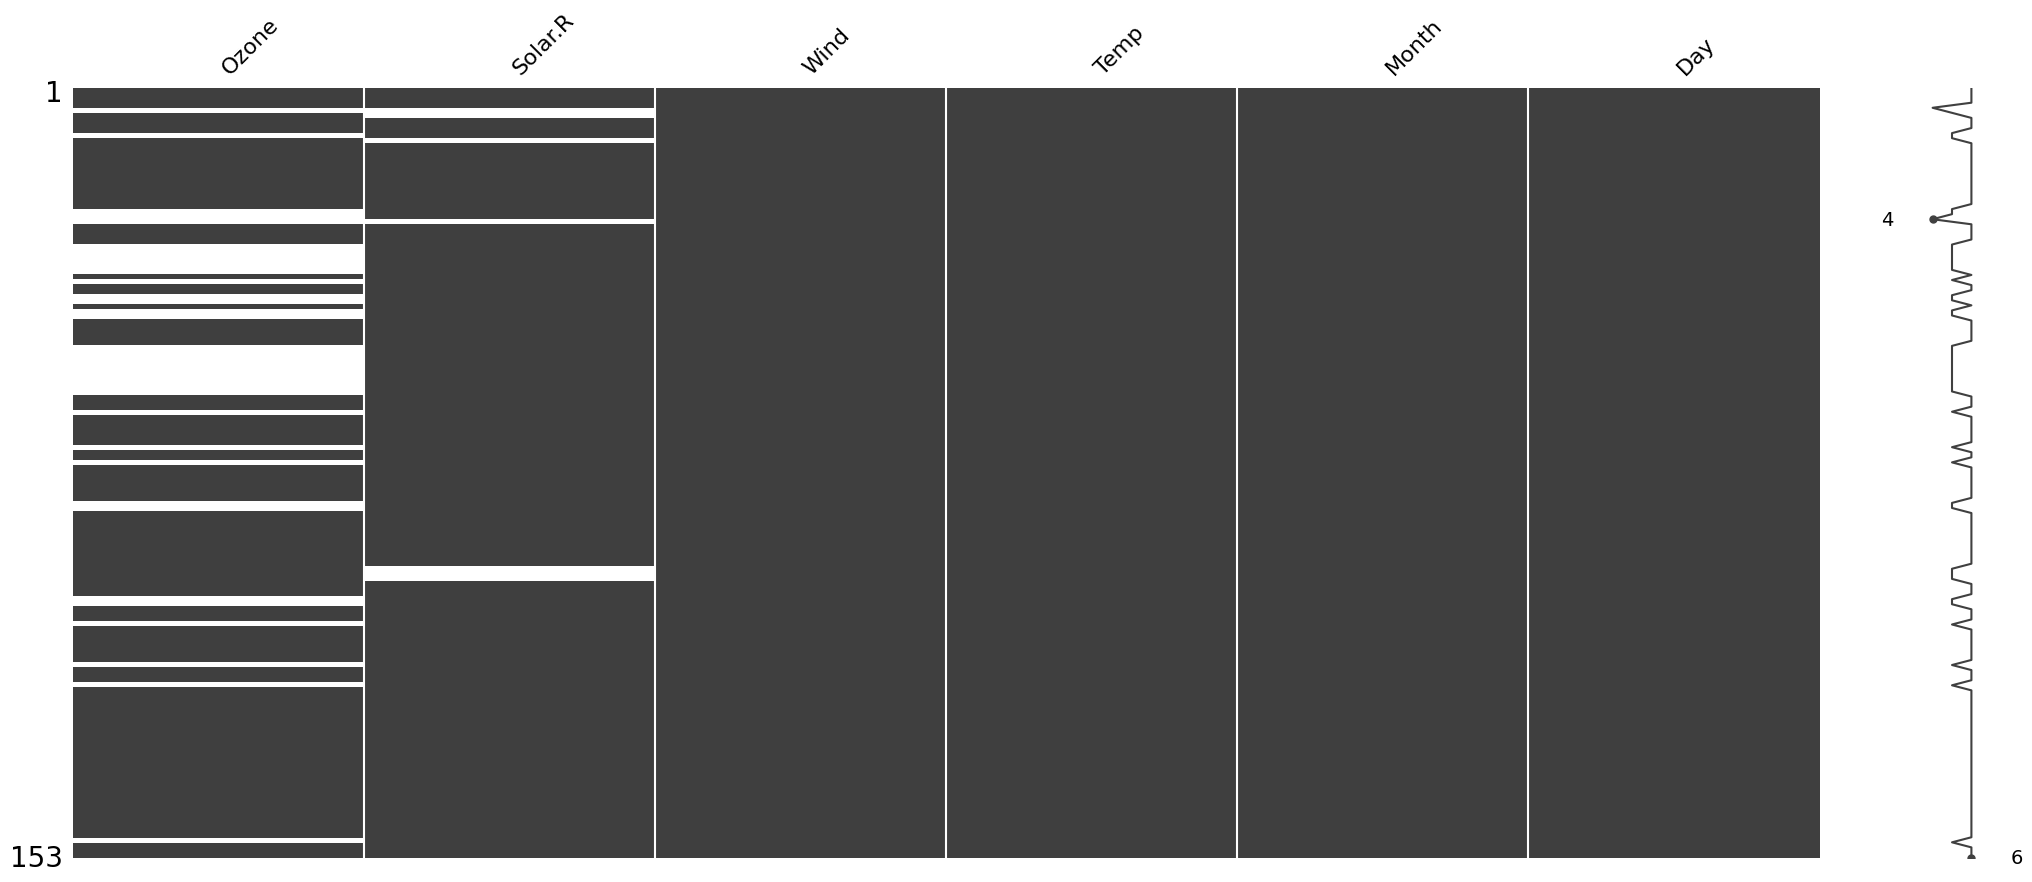

In [17]:
#오존량, 일조량 결측값 처리
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df)
#흰색 - 결측값
#스파크라인(spark line) - 각 샘플의 데이터 완성도를 표현

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70.0,9.0,26.0
149,42.12931,145.000000,13.2,77.0,9.0,27.0
150,14.00000,191.000000,14.3,75.0,9.0,28.0
151,18.00000,131.000000,8.0,76.0,9.0,29.0


In [14]:
X=df[['Solar.R','Wind','Temp']]
y=df['Ozone']

In [20]:
import statsmodels.api as sm
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Ozone   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              246.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):                    9.70e-58
Time:                        10:46:40   Log-Likelihood:                         -682.21
No. Observations:                 153   AIC:                                      1370.
Df Residuals:                     150   BIC:                                      1380.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Solar.R        0.0600      0.020      2.968      0.003       0.020       0.100
Wind          -3.4525      0.408     -8.462      0.000      -4.259      -2.646
Temp           0.8427      0.071     11.817      0.000       0.702       0.984
==============================================================================
Omnibus:                       40.913   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.086
Skew:                           1.212   Prob(JB):                     4.07e-18
Kurtosis:                       5.586   Cond. No.                         52.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#일조량 92, 풍량 15.5, 화씨온도 84 일때의 오존량 예측
result.predict([92,15.5,84])

array([22.79160327])

In [23]:
result.save("c:/data/ozone/ozone_regress.model")

In [1]:
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("c:/data/ozone/ozone_regress.model")

In [2]:
#일조량 92, 풍량 15.5, 화씨온도 84 일때의 오존량 예측
model.predict([92,15.5,84]) #새로운 값 순서대로 입력

array([22.79160327])

In [3]:
#일조량 80, 풍량 5.5, 화씨온도 64 일때의 오존량 예측
model.predict([80,5.5,64])

array([39.74253408])

In [2]:
import pandas as pd

# csv 파일을 로딩

df = pd.read_csv("c:/data/ozone/ozone2.csv")

df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,1,190.000000,7.4,67,41,0
1,5,2,118.000000,8.0,72,36,0
2,5,3,149.000000,12.6,74,12,0
3,5,4,313.000000,11.5,62,18,0
4,5,5,185.931507,14.3,56,42,1


In [3]:
#오존량 분류를 기준으로 한 평균값들

df.groupby("Result").mean()

,Month,Day,Solar.R,Wind,Temp,Ozone
Result,,,,,,
0,6.972222,15.180556,166.302702,11.270833,72.652778,20.902778
1,7.012346,16.358025,203.379334,8.790123,82.530864,60.938272


<Axes: >

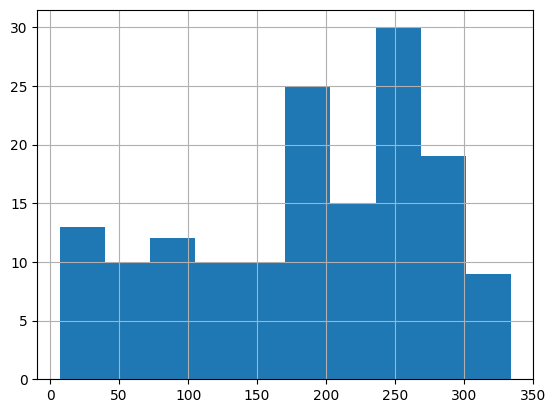

In [4]:
df["Solar.R"].hist()

<Axes: >

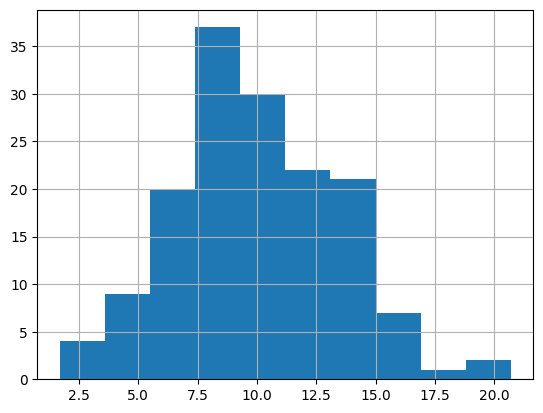

In [5]:
df["Wind"].hist()

<Axes: >

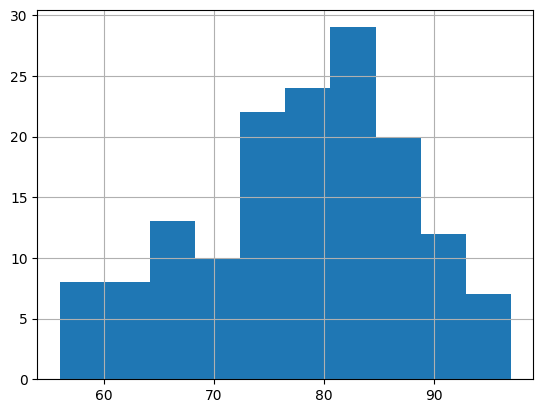

In [6]:
df["Temp"].hist()

In [7]:
df["Result"].value_counts()

Result
1    81
0    72
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_12064\436741415.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=df, palette=colors)


<Axes: xlabel='Result', ylabel='count'>

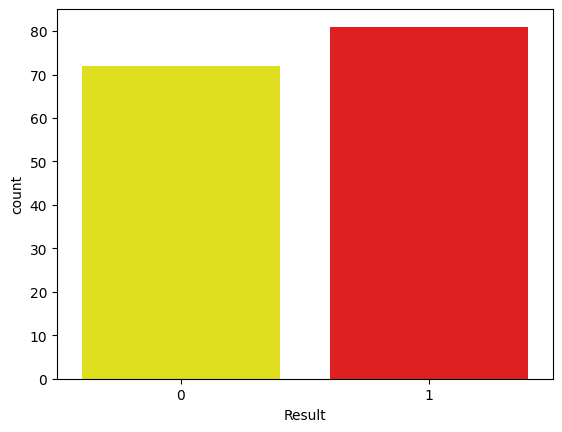

In [15]:
import seaborn as sns

colors = ["yellow", "red"]

sns.countplot(x='Result', data=df, palette=colors)

#불균형 데이터셋

In [11]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler
cols=['Solar.R', 'Wind', 'Temp']

X = df[cols]

y = df['Result']

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Result'])

df2=pd.concat([X_samp,y_samp],axis=1)

df2["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [12]:
#오버샘플링

from imblearn.over_sampling import SMOTE

cols=['Solar.R', 'Wind', 'Temp']

X = df[cols]

y = df['Result']

X_sample,y_sample=SMOTE(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Result'])

df2=pd.concat([X_samp,y_samp],axis=1)

df2["Result"].value_counts()

Result
0    81
1    81
Name: count, dtype: int64

In [13]:
X = X_samp[cols]

y = y_samp['Result']

In [14]:
import statsmodels.api as sm

#특정한 변수에서 값의 비율이 너무 낮은 경우 에러가 발생할 수 있음

#model=sm.Logit(y,X,method='bfgs')

model=sm.Logit(y,X)

result=model.fit()

#summary()에 표현되지 않는 값이 있을 경우 summary2() 사용

result.summary2()

Optimization terminated successfully.
         Current function value: 0.578389
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: Result           Pseudo R-squared: 0.166     
Date:               2024-03-15 09:42 AIC:              193.3980  
No. Observations:   162              BIC:              202.6608  
Df Model:           2                Log-Likelihood:   -93.699   
Df Residuals:       159              LL-Null:          -112.29   
Converged:          1.0000           LLR p-value:      8.4354e-09
No. Iterations:     5.0000           Scale:            1.0000    
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Solar.R    0.0035     0.0021    1.7215   0.0852   -0.0005    0.0076
Wind      -0.2730     0.0538   -5.0734   0.0000   -0.3785   -0.1676
Temp       0.0272     0.0079    3.4355   0.0006    0.0117    0.0427
=================================================================

"""

In [16]:
#pvalue가 0.05보다 큰 값들을 제거

cols=['Wind', 'Temp']

X=X_samp[cols]

y=y_samp['Result']

In [17]:
import statsmodels.api as sm

model=sm.Logit(y,X)

result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.587764
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  162
Model:                          Logit   Df Residuals:                      160
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Mar 2024   Pseudo R-squ.:                  0.1520
Time:                        09:42:30   Log-Likelihood:                -95.218
converged:                       True   LL-Null:                       -112.29
Covariance Type:            nonrobust   LLR p-value:                 5.118e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Wind          -0.2610      0.052     -4.995      0.000      -0.363      -0.159
Temp           0.0342      0.007      4.951      0.000       0.021       0.048
==============================================================================
"""

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()

model.fit(X_train, y_train)

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

학습용: 0.8217054263565892
검증용: 0.5757575757575758


In [19]:
#confusion matrix(혼동행렬, 오분류표) 출력

from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)

cm=confusion_matrix(y_test, pred)

cm

array([[ 7,  7],
       [ 7, 12]], dtype=int64)

In [20]:
df_cm=pd.DataFrame(cm, index=[0, 1],

                   columns=[0, 1])

df_cm

,0,1
0,7,7
1,7,12


<Axes: title={'center': 'Confusion Matrix'}>

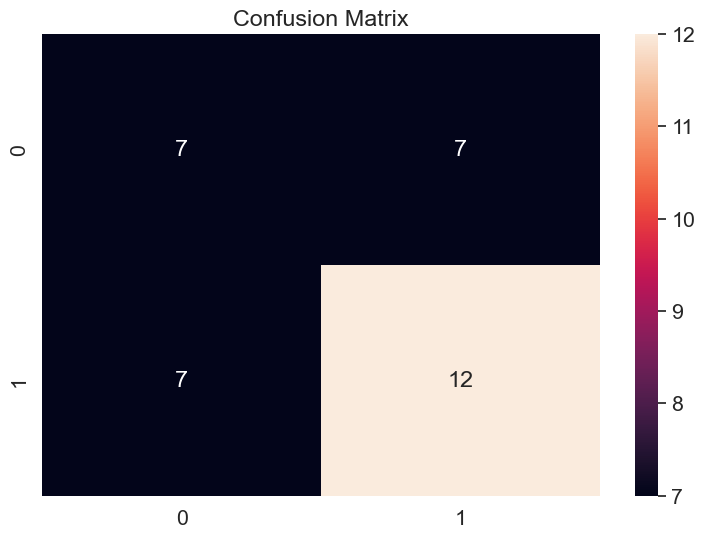

In [21]:
from matplotlib import pyplot as plt

sns.set(font_scale=1.4)

plt.figure(figsize=(9,6))

plt.title("Confusion Matrix")

sns.heatmap(df_cm, annot=True)

# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

In [22]:
# 붓꽃의 품종을 머신러닝을 이용하여 꽃잎과 꽃받침의 크기를 기반으로 분류

import pandas as pd

df = pd.read_csv("c:/data/iris/iris.csv")

df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [37]:
#품종을 기준으로 한 평균값들

df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth','Species']].groupby('Species').mean()   

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


Text(0, 0.5, 'SepalWidth')

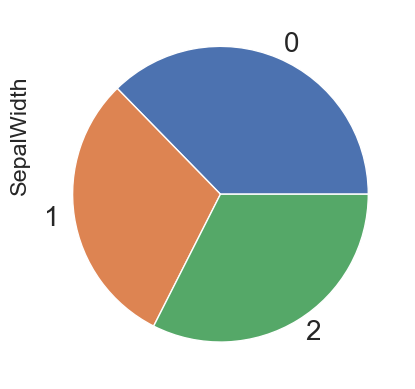

In [24]:
import matplotlib.pyplot as plt

#파이차트

sums_by_species = df.groupby('Species').sum()

var = 'SepalWidth'

sums_by_species[var].plot(kind='pie', fontsize=20)

plt.ylabel(var, horizontalalignment='left')

#plt.savefig('iris_pie.png')

         SepalLength  SepalWidth  PetalLength  PetalWidth  \
Species                                                     
0              250.3       170.9         73.2        12.2   
1              296.8       138.5        213.0        66.3   
2              329.4       148.7        277.6       101.3   

                                                      Name  
Species                                                     
0        setosasetosasetosasetosasetosasetosasetosaseto...  
1        versicolorversicolorversicolorversicolorversic...  
2        virginicavirginicavirginicavirginicavirginicav...  


<Axes: xlabel='Species'>

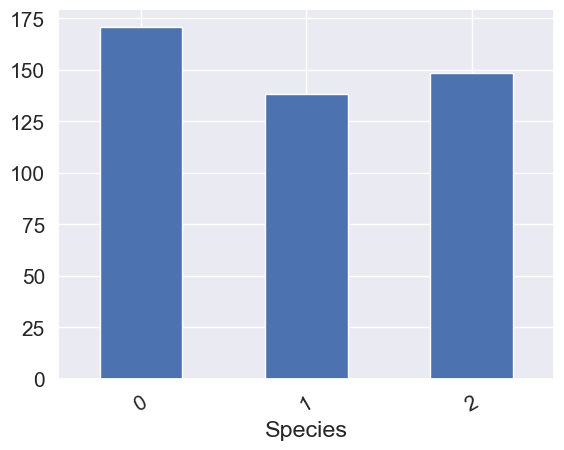

In [25]:
#품종별 변수 합계

sums_by_species = df.groupby('Species').sum()

print(sums_by_species)

var = 'SepalWidth'

#rot 글자회전(rotation)

#꽃받침 너비(cm) 기준 막대 그래프

sums_by_species[var].plot(kind='bar', fontsize=15, rot=30)

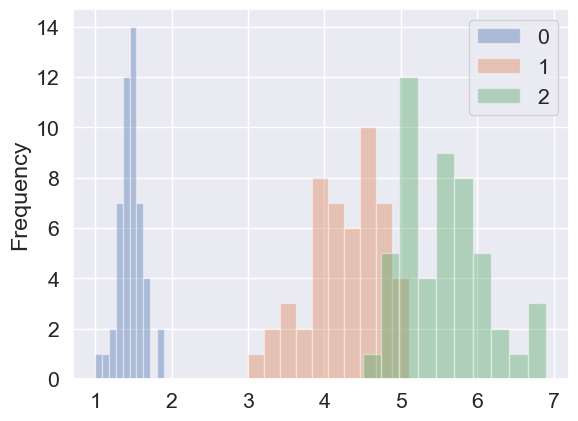

In [26]:
#품종별 꽃잎 길이

for spec in df['Species'].unique():

    subdf = df[df['Species']==spec]

    subdf['PetalLength'].plot(kind='hist', alpha=0.4, label=spec)

plt.legend(loc='upper right')

In [27]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_12064\3416393657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette=colors)


Text(0.5, 1.0, 'iris\n (0: setosa, 1: versicolor, 2: virginica )')

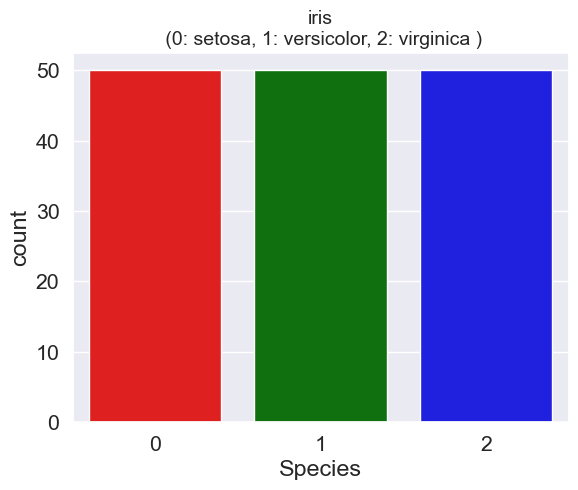

In [29]:
import seaborn as sns

colors = ["red", "green", "blue"]

sns.countplot(x='Species', data=df, palette=colors)

plt.title('iris\n (0: setosa, 1: versicolor, 2: virginica )', fontsize=14)

In [30]:
cols=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

X = df[cols]

y = df['Species']

In [31]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

학습용: 0.9666666666666667
검증용: 1.0


In [32]:
#confusion matrix(혼동행렬, 정오분류표) 출력

from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)

cm=confusion_matrix(y_test, pred)

cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

In [33]:
df_cm=pd.DataFrame(cm, index=[0, 1, 2], columns=[0, 1, 2])

df_cm

,0,1,2
0,10,0,0
1,0,10,0
2,0,0,10


<Axes: title={'center': 'Confusion Matrix'}>

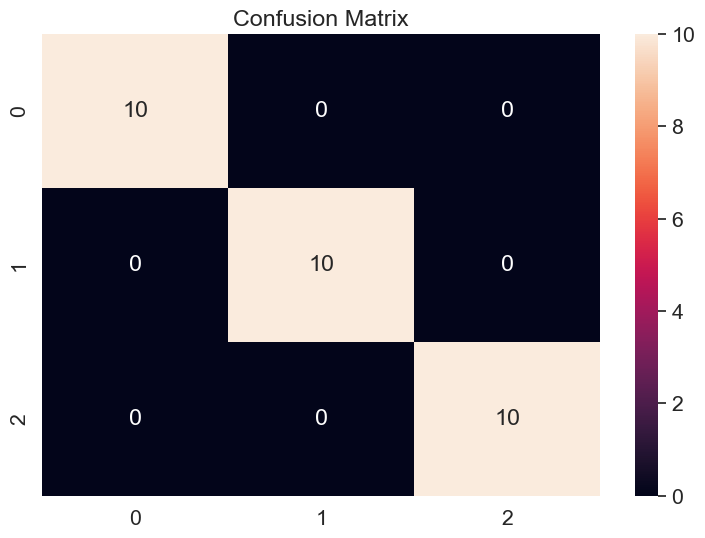

In [34]:
sns.set(font_scale=1.4)

plt.figure(figsize=(9,6))

plt.title("Confusion Matrix")

sns.heatmap(df_cm, annot=True)

# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

In [35]:
flowers=['setosa','versicolor','virginica']

X_new=[[7,3,5,1.4]]

pred=model.predict(X_new)

flowers[pred[0]]

c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'versicolor'

In [36]:
import joblib

joblib.dump(model, 'c:/data/iris/iris_logit.model')

['c:/data/iris/iris_logit.model']

In [38]:
import joblib

model=joblib.load('c:/data/iris/iris_logit.model')

flowers=['setosa', 'versicolor', 'virginica']

X_new=[[7, 3.0, 5, 1.4]]

pred=model.predict(X_new)

print('품종:',flowers[pred[0]])

X_new=[[5, 2.9, 1, 0.2]]

pred=model.predict(X_new)

print('품종:',flowers[pred[0]])

품종: versicolor
품종: setosa


c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
